In [ ]:
#Implementing the Quantum One Time Pad

c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


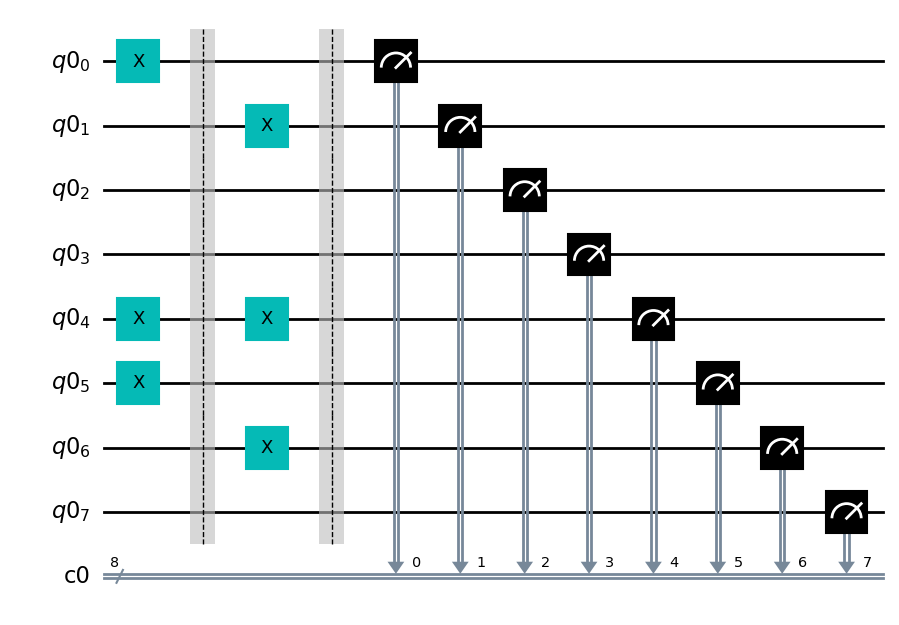

In [1]:
# Encryption

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# create a quantum curcuit for Asja's qubits.
# It's initially set to |0>.
qregA = QuantumRegister(8) # quantum register with 8 qubits
cregA = ClassicalRegister(8) # classical register with 8 bits
mycircuitA = QuantumCircuit(qregA,cregA) # quantum circuit with quantum and classical registers

# Enter your message as a list of numbers
message = [1,0,0,0,1,1,0,0]
# apply x-gate to change initial states from 0 to 1, preparing message "10001100"
for m in range(len(message)):
    if message[m]==1:
        mycircuitA.x(qregA[m])

# barrier for a better visualization
mycircuitA.barrier()

# create random key and apply x gates and encrypt message
key=[] 
for i in range(8):
    a=randrange(2)
    key.append(a)
    if a==1:
        mycircuitA.x(qregA[i])
        
mycircuitA.barrier()
mycircuitA.measure(qregA,cregA)
mycircuitA.draw(output='mpl')

In [2]:
# execute the circuit
job = execute(mycircuitA,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(mycircuitA)

# display the measurement results with total count
print("Encryption", encryption)
# this converts the measurement result string into a list
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
encrypted_message.reverse()
print()
print("Message:", message)
print("Key:", key)
print()
print("Encrypted Message:", encrypted_message)

C:\Users\jrnat\AppData\Local\Temp\ipykernel_1552\2505626356.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  job = execute(mycircuitA,Aer.get_backend('qasm_simulator'))
C:\Users\jrnat\AppData\Local\Temp\ipykernel_1552\2505626356.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(mycircuitA,Aer.get_backend('qasm_simulator'))


Encryption {'01100011': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Key: [0, 1, 0, 0, 1, 0, 1, 0]

Encrypted Message: [1, 1, 0, 0, 0, 1, 1, 0]


c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


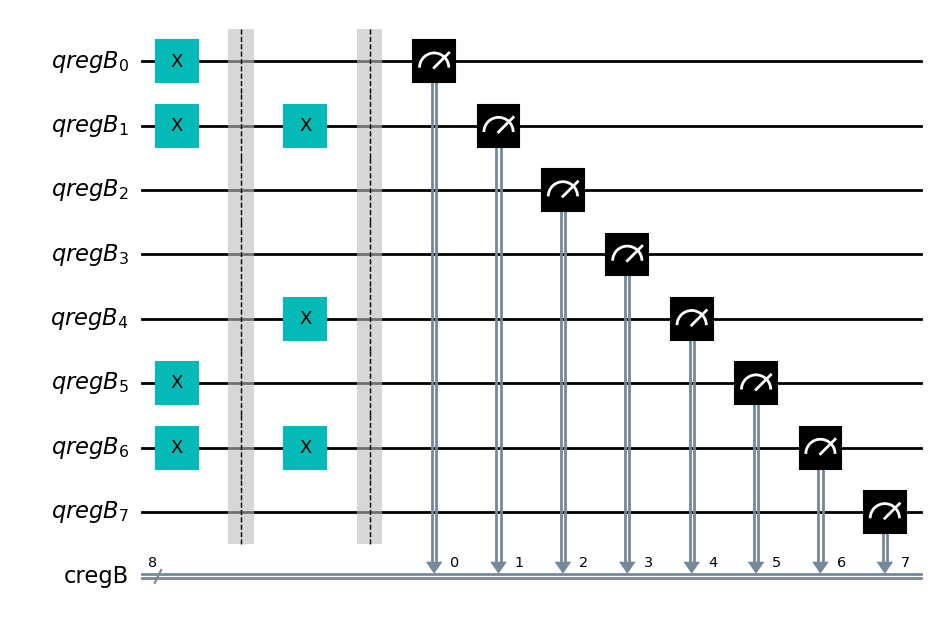

In [3]:
#Now let's create a quantum circuit to decrypt the message

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute_function

from random import randrange


#Now we have both the keys and the Encrypted message and we just have to
#use a decryption method to get the message


q2 = QuantumRegister(8, "qregB")
c2 = ClassicalRegister(8, "cregB")

qc2 = QuantumCircuit(q2,c2)

for m in range(len(encrypted_message)):
    if encrypted_message[m] == 1:
        qc2.x(q2[m])
qc2.barrier()
#Now we reconstructed encrypted message now we have to use the randomly generated key to decrypt the message
        
for i in range(len(key)):
    if key[i]==1:
        qc2.x(q2[i])


qc2.barrier()

#Doing the measurements
qc2.measure(q2,c2)
qc2.draw(output = 'mpl')

In [4]:
#Running the code and getting the results for the decrypted message at B
# execute the circuit
job = execute(qc2,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(qc2)

# display the measurement results with total count
print("Decryption", decryption)
# this converts the measurement result string into a list
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'00110001': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Decrypted Message: [1, 0, 0, 0, 1, 1, 0, 0]

Protocol is correct!


C:\Users\jrnat\AppData\Local\Temp\ipykernel_1552\2614727336.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc2,Aer.get_backend('qasm_simulator'))
